In [1]:
# Import necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import KFold
#from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer


In [2]:
movies = pd.read_csv("Training sheet.csv")

In [3]:
movies_df = pd.DataFrame(movies)
movies_df.head()

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9


In [4]:
# import ast

# def eval_code(code):
#     parsed = ast.parse(code, mode='eval')
#     fixed = ast.fix_missing_locations(parsed)
#     compiled = compile(fixed, '<string>', 'eval')
#     eval(compiled)

# features = ['name', 'display_name', 'creative_type', 'source', 'production_method', 'genre', 'language',
#             'board_rating_reason', 'movie_board_rating_display_name', 'movie_release_pattern_display_name']
# for feature in features:
#     movies_df[feature] = eval_code(movies_df[feature])

In [5]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace("/", ""))
        else:
            if isinstance(x, str):
                return str.lower(x.replace(",", ""))
            else:
                return ''

In [6]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['name', 'display_name', 'creative_type', 'source', 'production_method', 'genre', 'language',
            'board_rating_reason', 'movie_board_rating_display_name', 'movie_release_pattern_display_name']
# for feature in features:
#     movies_df[feature] = movies_df[feature].apply(literal_eval)
    
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [7]:
movies_df.columns

Index(['id', 'name', 'display_name', 'production_year', 'movie_sequel',
       'creative_type', 'source', 'production_method', 'genre', 'language',
       'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name', 'total', 'Category'],
      dtype='object')

## Logistic Regression Classifier Model

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from math import sqrt
import seaborn as sns

In [9]:
# target = movies_df['Category']
# movies_df = movies_df.drop('Category', axis = 1)
movies_df.keys()

Index(['id', 'name', 'display_name', 'production_year', 'movie_sequel',
       'creative_type', 'source', 'production_method', 'genre', 'language',
       'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name', 'total', 'Category'],
      dtype='object')

In [10]:
# Use Pandas get_dummies to convert categorical data

y = movies_df["Category"].values.reshape(-1, 1)
# movies_df = movies_df.drop(['Category'])
X = movies_df
df_onehot = pd.get_dummies(X)
df_onehot.head()
print(X.shape, y.shape)

(1196, 15) (1196, 1)


In [11]:
df_onehot.head()

,id,production_year,movie_sequel,total,Category,"name_10,000 b.c.",name_12 rounds,name_127 hours,name_1408,name_2010 oscar shorts,...,movie_board_rating_display_name_pg,movie_board_rating_display_name_pg-13,movie_board_rating_display_name_r,movie_release_pattern_display_name_exclusive,movie_release_pattern_display_name_expands wide,movie_release_pattern_display_name_imax,movie_release_pattern_display_name_limited,movie_release_pattern_display_name_oscar qualifying run,movie_release_pattern_display_name_special engagement,movie_release_pattern_display_name_wide
0,7950115,2009,0,2784,9,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,50950115,2011,1,1328,9,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,119870115,2011,1,1124,9,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,119590115,2010,1,1064,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,91700115,2011,1,1044,9,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [12]:
X = df_onehot.copy()
X.head()

,id,production_year,movie_sequel,total,Category,"name_10,000 b.c.",name_12 rounds,name_127 hours,name_1408,name_2010 oscar shorts,...,movie_board_rating_display_name_pg,movie_board_rating_display_name_pg-13,movie_board_rating_display_name_r,movie_release_pattern_display_name_exclusive,movie_release_pattern_display_name_expands wide,movie_release_pattern_display_name_imax,movie_release_pattern_display_name_limited,movie_release_pattern_display_name_oscar qualifying run,movie_release_pattern_display_name_special engagement,movie_release_pattern_display_name_wide
0,7950115,2009,0,2784,9,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,50950115,2011,1,1328,9,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,119870115,2011,1,1124,9,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,119590115,2010,1,1064,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,91700115,2011,1,1044,9,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


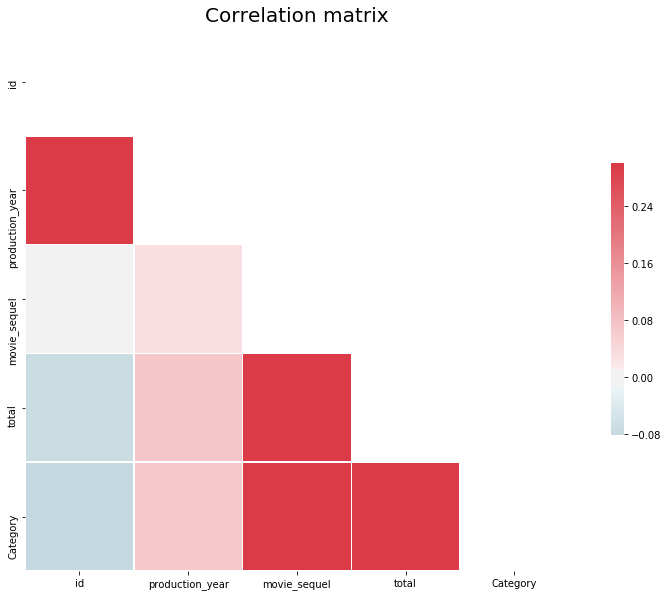

In [13]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = movies_df.corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

In [14]:

# now we use the train_test_split function already available in sklearn library to split our data set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .20, random_state = 42)

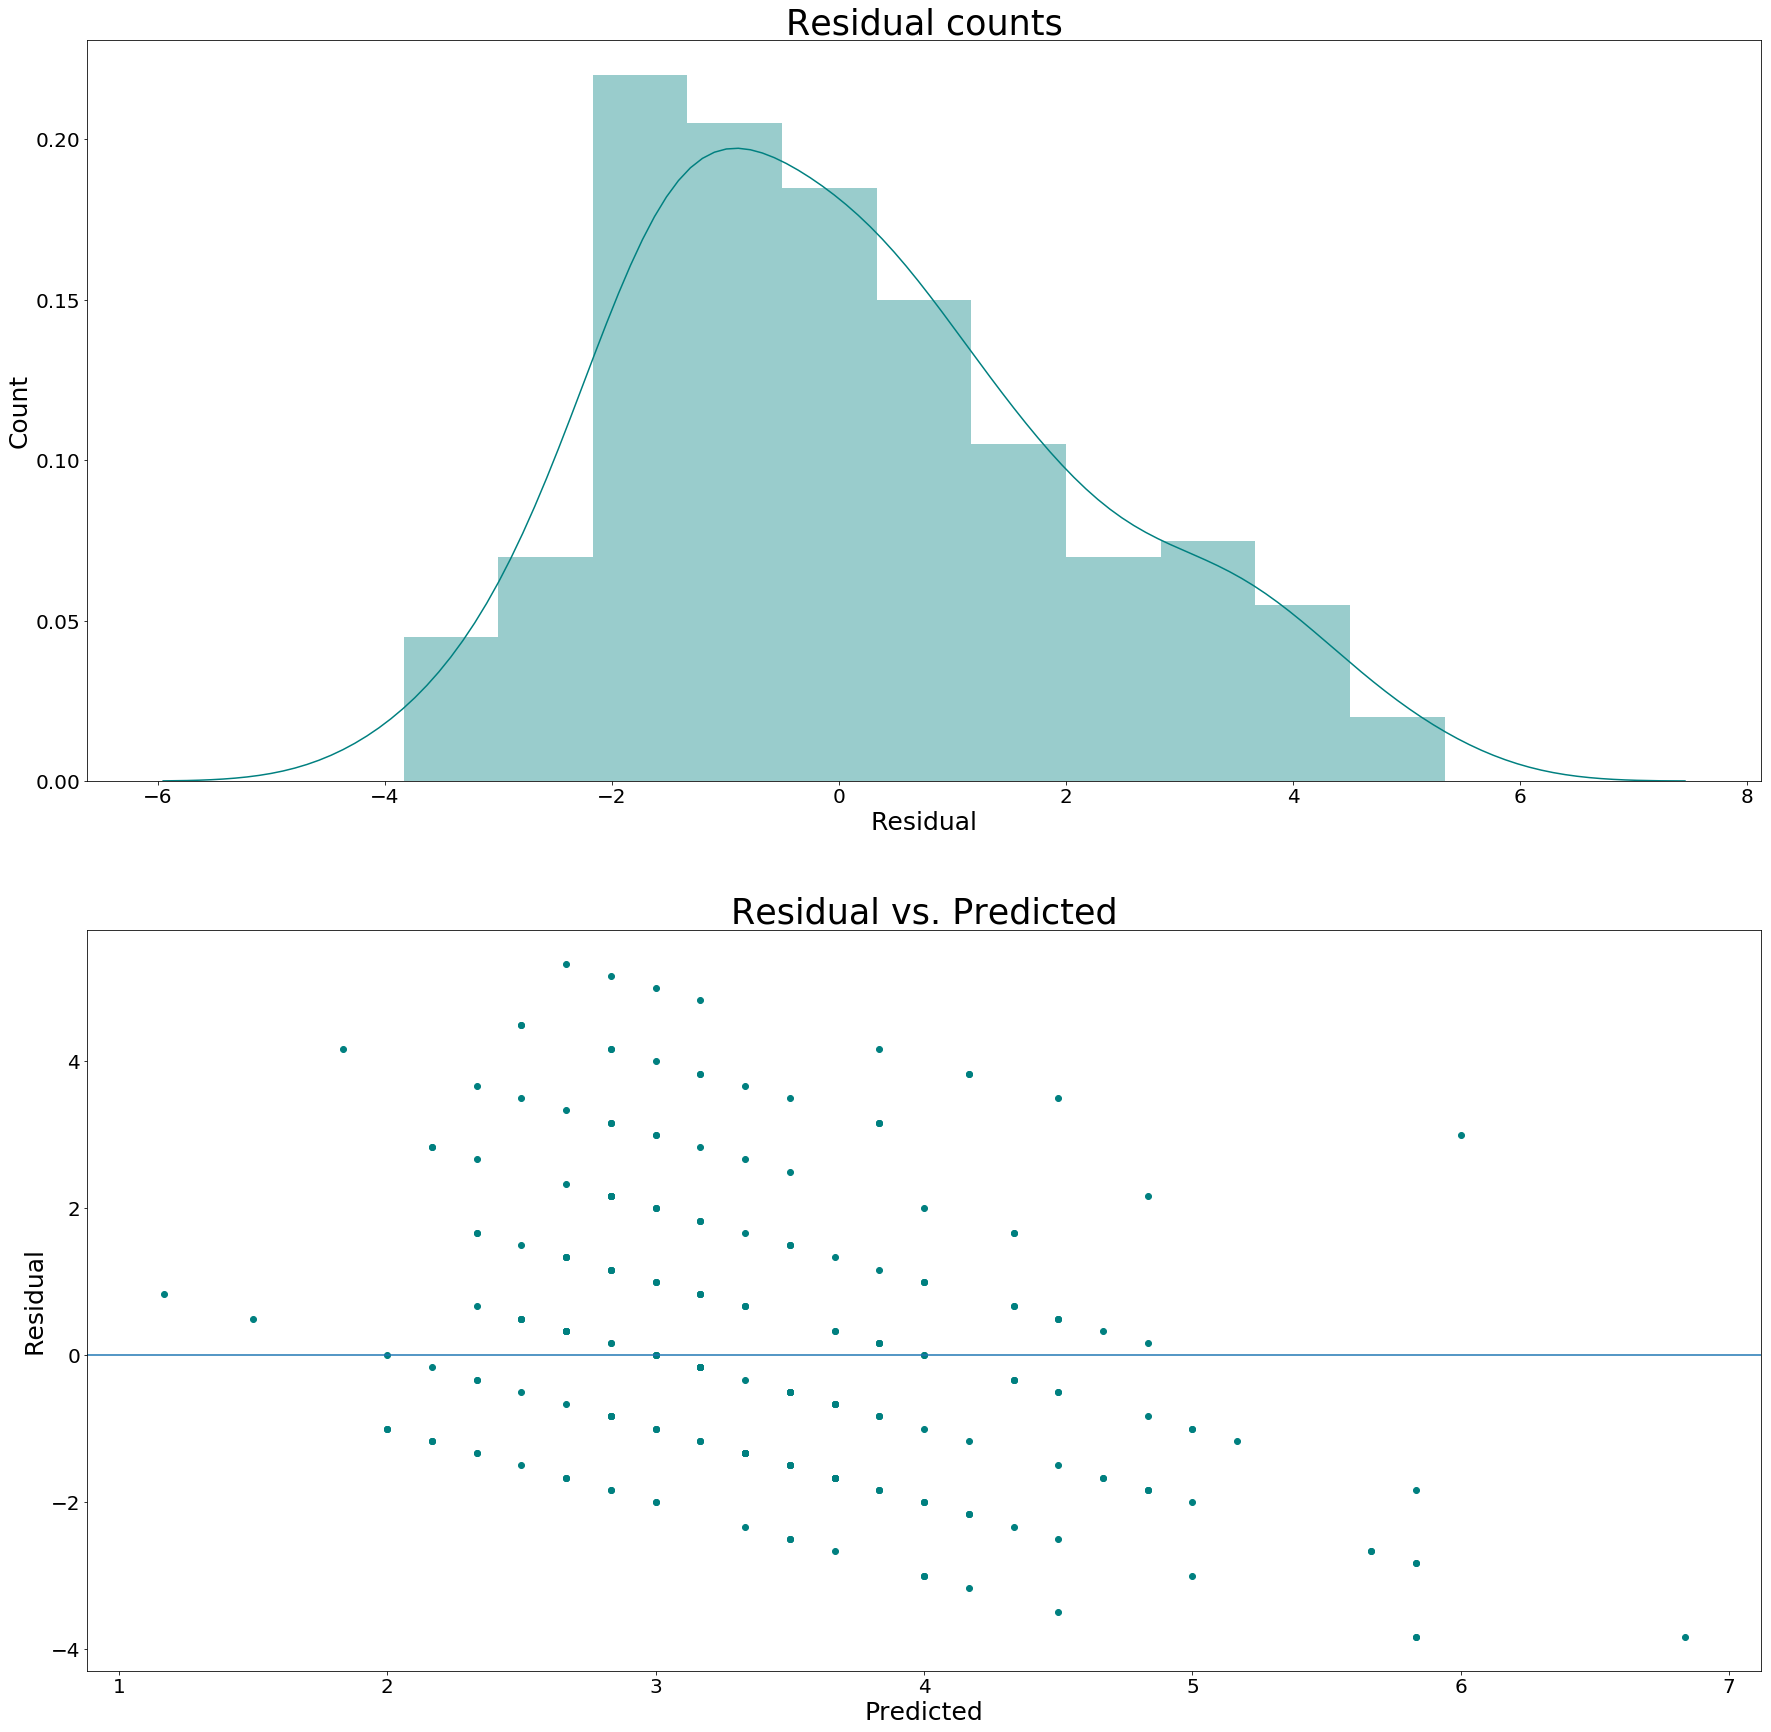

RMSE:
1.9955970052611844


In [15]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [16]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: -0.17


In [17]:
# to prevent overfitting the model
rmse_l = []
num = []
for n in range(2, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    num.append(n)

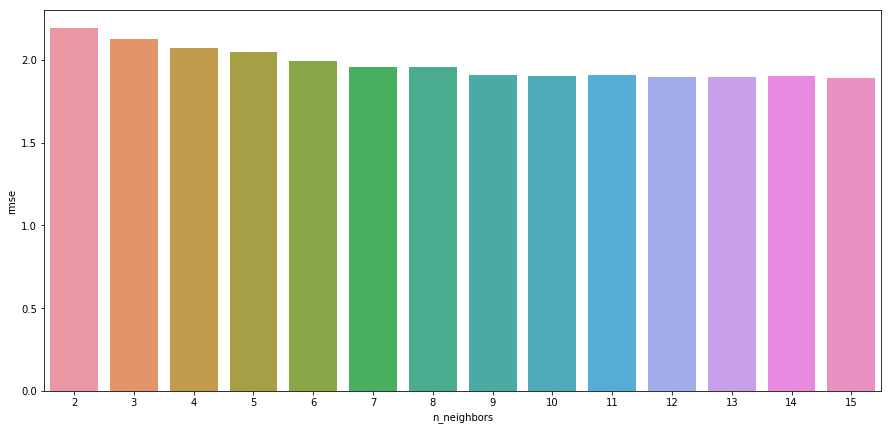

In [18]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()
# 6, 7 or 8 would be ideal

In [19]:
# Cross Validating the model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

r_sq = []
deep = []
mean_scores = []
y = y.ravel()
print(y.shape)

#loss : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}
for n in range(3, 11):
    gbr = GradientBoostingRegressor(loss ='ls', max_depth=n)
    gbr.fit(X, y)
    deep.append(n)
    r_sq.append(gbr.score(X, y))
    mean_scores.append(cross_val_score(gbr, X, y, cv=6).mean())

(1196,)


In [20]:
plt_gbr = pd.DataFrame()

plt_gbr['mean_scores'] = mean_scores
plt_gbr['depth'] = deep
plt_gbr['R²'] = r_sq
plt_gbr.head()

,mean_scores,depth,R²
0,-1.289713,3,1.0
1,-1.240317,4,1.0
2,-1.260782,5,1.0
3,-1.225668,6,1.0
4,-1.285591,7,1.0


In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


Y_train = Y_train.ravel()
gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit(X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted


rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)


Cross Validation Scores:
[-1.03026647 -2.5801673   0.          0.91583895  0.          0.94738733
  0.          0.10501163  0.          0.          0.73615807  0.        ]

Mean Score:
-0.0755031494845439

RMSE:
0.00025460959926508915


In [22]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 1.00


In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100)

In [24]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
predicted_clusters = kmeans.predict(X)
predicted_clusters
cluster_labels=[]
j=0
for i in predicted_clusters:
    cluster_labels.append([i,y[j]])
    j+=1
cluster_labels
testdf=pd.DataFrame(cluster_labels)
testdf=testdf.rename(columns={0: 'Class', 1: 'Category'})
testdf=testdf.sort_values('Class', ascending=True)
testdf=testdf.set_index("Class")
#testdf=testdf.groupby("Class")

In [26]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
print(labels)

[32 94 48 ... 33 47 91]


In [27]:
testdf.to_csv("TrainingCleansed_Clusters.csv")

In [28]:
# movies_score = pd.read_csv("Scoring sheet.csv")
test=X[:1]

test

,id,production_year,movie_sequel,total,Category,"name_10,000 b.c.",name_12 rounds,name_127 hours,name_1408,name_2010 oscar shorts,...,movie_board_rating_display_name_pg,movie_board_rating_display_name_pg-13,movie_board_rating_display_name_r,movie_release_pattern_display_name_exclusive,movie_release_pattern_display_name_expands wide,movie_release_pattern_display_name_imax,movie_release_pattern_display_name_limited,movie_release_pattern_display_name_oscar qualifying run,movie_release_pattern_display_name_special engagement,movie_release_pattern_display_name_wide
0,7950115,2009,0,2784,9,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [29]:
kmeans.predict(test)

array([32])

In [30]:
kmeans.score(test)

-5413209605.828125

In [31]:
import pickle
filename = 'kmeans_movies_cluster.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [32]:
# scoring = pd.read_csv("Scoring Sheet.csv")
# # scoredf = scoring[:1]

In [33]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(test)
print("The test data belongs to Class: ", result)
df=testdf.loc[testdf.index==result[0]]

The test data belongs to Class:  [32]


In [34]:
# Use Pandas get_dummies to convert categorical data

# y = movies_df["Category"].values.reshape(-1, 1)
# movies_df = movies_df.drop(['Category'])
# X_score = scoredf
# scoredf_onehot = pd.get_dummies(scoring)
# scoredf_onehot.head()
# print(X_score.shape, y.shape)

In [35]:
# X_score = scoredf_onehot.copy()

In [36]:
# X_score.head()

In [37]:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.predict(X_score)
# print("The test data belongs to Class: ", result)
# df=scoredf.loc[scoredf.index==result[0]]

print("The categories are:",df.values)

The categories are: [[2]
 [3]
 [4]
 [4]
 [2]
 [3]
 [2]
 [2]
 [4]
 [2]
 [9]
 [4]
 [6]
 [1]
 [1]
 [1]
 [5]]
